#Extraindo os dados

In [2]:
!unzip data_discentes_ufrn.zip

Archive:  data_discentes_ufrn.zip
   creating: data_discentes_ufrn/
  inflating: data_discentes_ufrn/discentes-2010.csv  
  inflating: data_discentes_ufrn/discentes-2011.csv  
  inflating: data_discentes_ufrn/discentes-2012.csv  
  inflating: data_discentes_ufrn/discentes-2013.csv  
  inflating: data_discentes_ufrn/discentes-2014.csv  
  inflating: data_discentes_ufrn/discentes-2015.csv  
  inflating: data_discentes_ufrn/discentes-2016.csv  
  inflating: data_discentes_ufrn/discentes-2017.csv  
  inflating: data_discentes_ufrn/discentes-2018.csv  
  inflating: data_discentes_ufrn/discentes-2019.csv  
  inflating: data_discentes_ufrn/discentes-2020.csv  


#Importando as libs

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

#Lendo os aquivos e contacatenando em apenas um dataframe

In [29]:
data = pd.read_csv('data_discentes_ufrn/discentes-2010.csv',sep=';',usecols=[3,4,7,9,11])

for i in range(2011,2021):
  data = pd.concat([pd.read_csv('data_discentes_ufrn/discentes-'+str(i)+'.csv',sep=';',usecols=[3,4,7,9,11]),data],axis=0,ignore_index=True)

In [30]:
data.head()

,ano_ingresso,periodo_ingresso,status,nivel_ensino,nome_curso
0,2020,1.0,ATIVO,TÉCNICO,CURSO TÉCNICO DA METRÓPOLE DIGITAL
1,2020,2.0,CADASTRADO,GRADUAÇÃO,CIÊNCIAS E TECNOLOGIA
2,2020,1.0,ATIVO,GRADUAÇÃO,ENGENHARIA AGRONÔMICA
3,2020,2.0,CADASTRADO,GRADUAÇÃO,CIÊNCIAS E TECNOLOGIA
4,2020,1.0,ATIVO,GRADUAÇÃO,ENGENHARIA MECÂNICA


#Alterando os labels da coluna Status

In [31]:
def change_status(label):
  if label == 'CANCELADO':
    return 'DESVINCULADO'
  else:
    return 'VINCULADO/CONCLUIDO'

In [32]:
data.status = data.status.apply(change_status)

#Agrupando
Agrupando por nome do curso, ano de ingresso, status do aluno e nível de ensino

In [76]:
groupred = data[['nome_curso','ano_ingresso','status','nivel_ensino']].groupby(['nome_curso','ano_ingresso','status','nivel_ensino'])

In [77]:
groupred.head()

,nome_curso,ano_ingresso,status,nivel_ensino
0,CURSO TÉCNICO DA METRÓPOLE DIGITAL,2020,VINCULADO/CONCLUIDO,TÉCNICO
1,CIÊNCIAS E TECNOLOGIA,2020,VINCULADO/CONCLUIDO,GRADUAÇÃO
2,ENGENHARIA AGRONÔMICA,2020,VINCULADO/CONCLUIDO,GRADUAÇÃO
3,CIÊNCIAS E TECNOLOGIA,2020,VINCULADO/CONCLUIDO,GRADUAÇÃO
4,ENGENHARIA MECÂNICA,2020,VINCULADO/CONCLUIDO,GRADUAÇÃO
...,...,...,...,...
200763,TECNICO EM AGROPECUARIA SUBSEQUENTE,2010,DESVINCULADO,TÉCNICO
200852,ESPECIALIZAÇÃO EM EDUCAÇÃO MUSICAL NA EDUCAÇÃO...,2010,VINCULADO/CONCLUIDO,LATO SENSU
200963,MESTRADO EM ADMINISTRAÇÃO,2010,DESVINCULADO,MESTRADO
200999,MESTRADO EM ADMINISTRAÇÃO,2010,DESVINCULADO,MESTRADO


In [106]:
group_data = groupred['status'].count().to_frame(name='soma_status').reset_index()

#Agrupando novamente e realizando a soma dos status
Reagrupando apenas os cursos de graduação por nome e status e somando o total de status agrupados

In [113]:
g = group_data.loc[group_data.nivel_ensino == 'GRADUAÇÃO'].groupby(['nome_curso','status']).sum().reset_index()

In [114]:
g

,nome_curso,status,ano_ingresso,soma_status
0,ADMINISTRAÇÃO,DESVINCULADO,22165,864
1,ADMINISTRAÇÃO,VINCULADO/CONCLUIDO,22165,2093
2,ADMINISTRAÇÃO PÚBLICA,DESVINCULADO,10071,632
3,ADMINISTRAÇÃO PÚBLICA,VINCULADO/CONCLUIDO,10068,591
4,ANÁLISE E DESENVOLVIMENTO DE SISTEMAS,DESVINCULADO,16132,128
...,...,...,...,...
160,TECNOLOGIA DA INFORMAÇÃO,VINCULADO/CONCLUIDO,16132,1564
161,TURISMO,DESVINCULADO,22165,574
162,TURISMO,VINCULADO/CONCLUIDO,22165,779
163,ZOOTECNIA,DESVINCULADO,22165,276


#Calculando porcentagem de cada status por curso

In [118]:
percent = []
for curso in g.nome_curso.unique():
  soma = g.loc[g.nome_curso == curso].soma_status.sum()
  for s_status in g.loc[g.nome_curso == curso].soma_status:
      percent.append((100/soma)*s_status)

g['percent'] = percent

In [119]:
g

,nome_curso,status,ano_ingresso,soma_status,percent
0,ADMINISTRAÇÃO,DESVINCULADO,22165,864,29.218803
1,ADMINISTRAÇÃO,VINCULADO/CONCLUIDO,22165,2093,70.781197
2,ADMINISTRAÇÃO PÚBLICA,DESVINCULADO,10071,632,51.676206
3,ADMINISTRAÇÃO PÚBLICA,VINCULADO/CONCLUIDO,10068,591,48.323794
4,ANÁLISE E DESENVOLVIMENTO DE SISTEMAS,DESVINCULADO,16132,128,47.761194
...,...,...,...,...,...
160,TECNOLOGIA DA INFORMAÇÃO,VINCULADO/CONCLUIDO,16132,1564,60.714286
161,TURISMO,DESVINCULADO,22165,574,42.424242
162,TURISMO,VINCULADO/CONCLUIDO,22165,779,57.575758
163,ZOOTECNIA,DESVINCULADO,22165,276,52.371917


In [162]:
desvinculados = g.loc[g.ano_ingresso == 22165].loc[g.status == 'DESISTENTE/JUBILADO'].sort_values(by='percent',ascending=False)

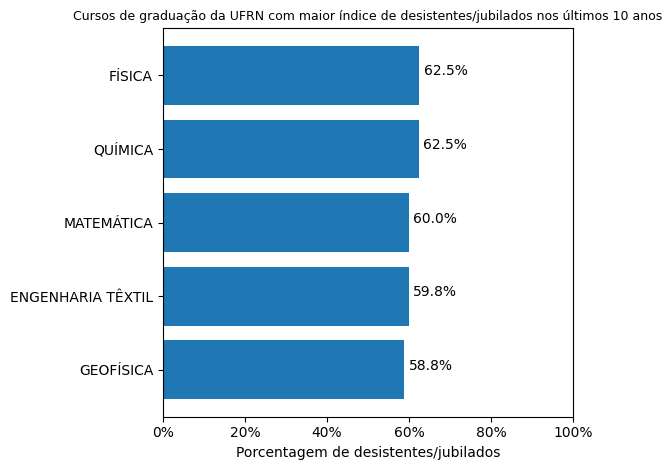

In [170]:

plt.rcdefaults()
fig, ax = plt.subplots()

y_pos = np.arange(len(desvinculados.head(5)))
ax.barh(y_pos, desvinculados.head(5).percent, align='center')
ax.set_yticks(y_pos)
ax.set_yticklabels(desvinculados.head(5).nome_curso)
ax.invert_yaxis()
ax.set_xlim(right=100)
for i,ii in enumerate(desvinculados.head(5).percent):
  ax.annotate(xy=(ii+1,i),s=str('%.1f'%ii)+'%')
ax.set_xlabel('Porcentagem de desistentes/jubilados')
ax.set_xticklabels(['0%','20%','40%','60%','80%','100%'])
#ax.set_title('Cursos de graduação da UFRN com maior índice de desistentes/jubilados nos últimos 10 anos',fontsize=9)

plt.tight_layout()
plt.savefig("graph.png",dpi=300)